<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Classification_CarsTypes_RandomForest_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('/content/car data.csv')

In [3]:
base.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
base.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
base.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
base.head(25)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [11]:
#VISUALIZAO DE DADOS
np.unique(base['Transmission'], return_counts = True)

(array(['Automatic', 'Manual'], dtype=object), array([ 40, 261]))

temos 40 carros do tipo automatico e 261 do tipo manual

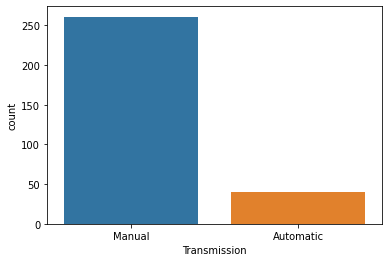

In [12]:
sns.countplot( x = base['Transmission']);

In [13]:
base.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

excelente, não temos valores faltantes

Temos dados numericos e categoricos(strings), temos que alinhar todos em numericos, e para isso, vamos usar a função Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(base['Car_Name'])

In [16]:
base['Nome_Carro'] = labels

In [17]:
label_encode = LabelEncoder()
labels_ = label_encode.fit_transform(base['Fuel_Type'])

In [18]:
base['Combustivel'] = labels_

In [19]:
label_encode = LabelEncoder()
labels2 = label_encode.fit_transform(base['Seller_Type'])

In [20]:
base['Distribuidora'] = labels2

e agora falta nosso target, Trasmission, que vai ser o ou 1, 1 é manual, e 0 automatico

In [21]:
label_encode = LabelEncoder()
labels3 = label_encode.fit_transform(base['Transmission'])

In [22]:
base['target'] = labels3

vamos checar como ficou nossa base de dados

In [23]:
base.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Nome_Carro,Combustivel,Distribuidora,target
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,90,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,93,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,68,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,96,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,92,1,0,1


agora vamos apagar as colunas que não preciamos mais

In [24]:
base.drop(columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'], axis=1, inplace=True)

In [25]:
base.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Nome_Carro,Combustivel,Distribuidora,target
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1


agora só falta deixarmos tudo na mesma escala, para o algoritimo nao entender que alguma coluna tem relevancia maior que a outra

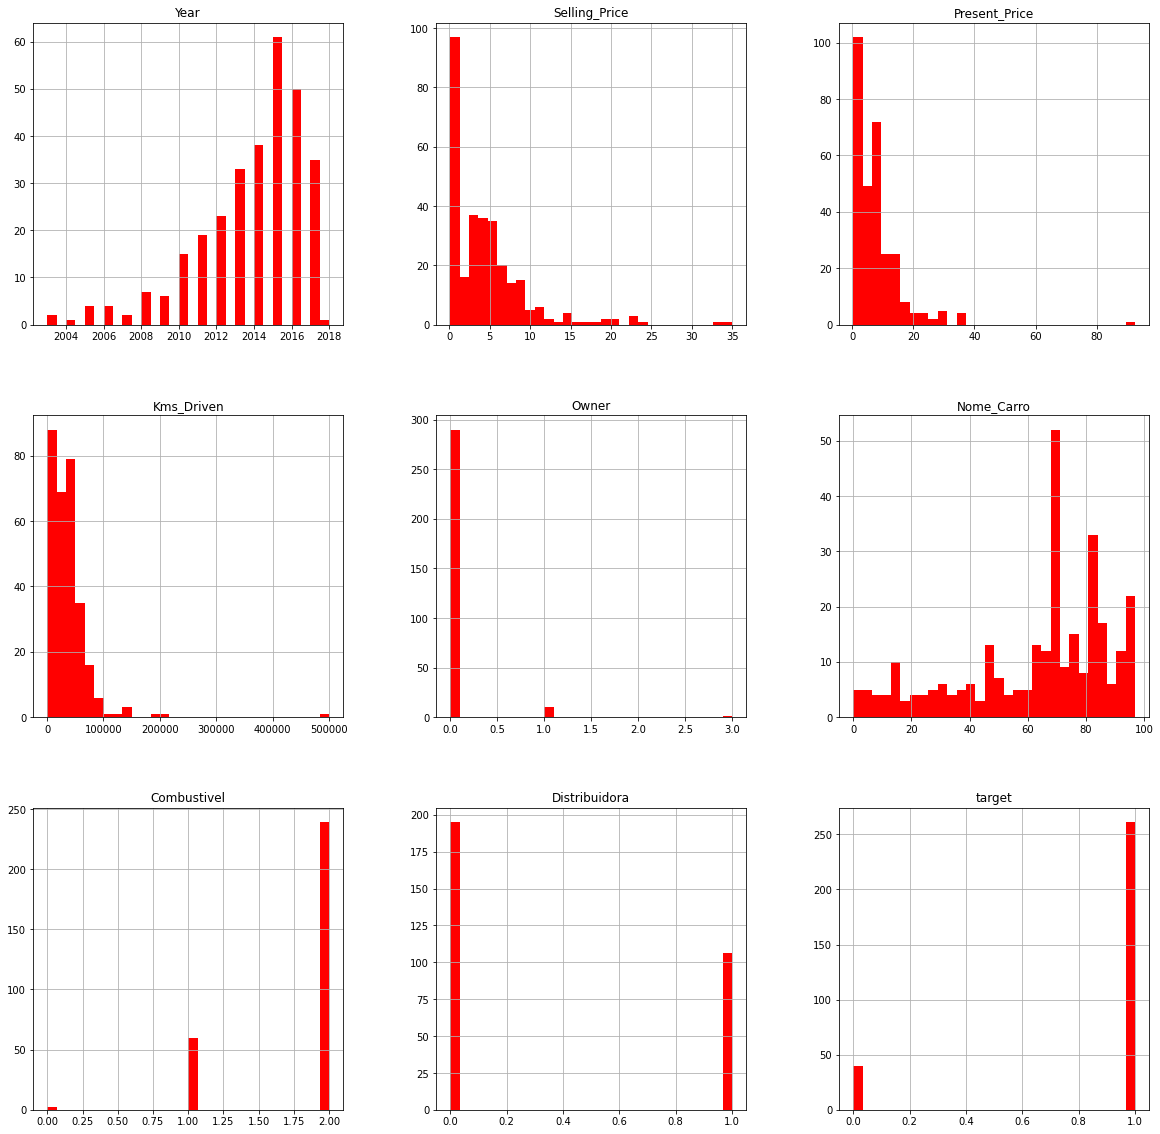

In [27]:
base.hist(bins=30, figsize=(20,20), color = 'r');

vamos treinar o modelo

In [30]:
x = base.iloc[:,0:8].values
y = base.iloc[:,8].values

In [31]:
x.shape

(301, 8)

In [32]:
y.shape

(301,)

deixando tudo na mesma escala

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [37]:
x


array([[0.73333333, 0.09312321, 0.0571088 , ..., 0.92783505, 1.        ,
        0.        ],
       [0.66666667, 0.13323782, 0.09991331, ..., 0.95876289, 0.5       ,
        0.        ],
       [0.93333333, 0.20487106, 0.10327265, ..., 0.70103093, 1.        ,
        0.        ],
       ...,
       [0.4       , 0.09312321, 0.11573472, ..., 0.71134021, 1.        ,
        0.        ],
       [0.93333333, 0.32664756, 0.1319896 , ..., 0.71134021, 0.5       ,
        0.        ],
       [0.86666667, 0.14899713, 0.06046814, ..., 0.68041237, 1.        ,
        0.        ]])

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

In [39]:
x_treino.shape

(225, 8)

In [40]:
y_treino.shape

(225,)

In [41]:
x_teste.shape

(76, 8)

In [42]:
y_teste.shape

(76,)

Algoritimo de Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [45]:
rf

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [46]:
rf.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [47]:
previsao = rf.predict(x_teste)
previsao

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [48]:
y_teste

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
accuracy_score(y_teste, previsao)

0.8947368421052632

modelo excelente, quase 90% de acurácia

In [49]:
from yellowbrick.classifier import ConfusionMatrix

In [52]:
cm = ConfusionMatrix(rf)

0.8947368421052632

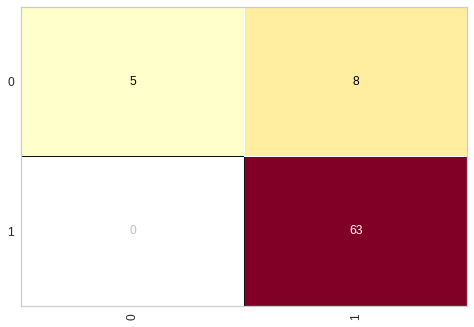

In [54]:
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

aqui vemos que o algoritimo preveu 63 carros manuais e acertou que eram manuais todas as vezes ; no entanto o algoritimo preveu que 5 carros eram automaticos porém errou classificando 8 carros como automaticos mas eram manuais

In [55]:
print(classification_report(y_teste,previsao))

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.89      1.00      0.94        63

    accuracy                           0.89        76
   macro avg       0.94      0.69      0.75        76
weighted avg       0.91      0.89      0.87        76



vemos aqui detalhadamente como o algoritimo trabalhou, no geral tivemos uma excelente acurácia, mas na hora de prever os carros automaticos, o algoritimo não foi tão eficiente quanto ao prever os carros manuais

Podemos agora utilizar outro algoritimo e compararmos os resultados

Algoritimo de Support Vector Machine(SVM)

In [57]:
from sklearn.svm import SVC

In [58]:
svm = SVC(kernel='rbf', random_state=1, C=2.0) #quanto maior C , melhor mas nao adianta exagerar nesse valor
svm.fit(x_treino, y_treino)

SVC(C=2.0, random_state=1)

In [62]:
previsão = svm.predict(x_teste)
previsão

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
y_teste

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [63]:
accuracy_score(y_teste, previsão)

0.868421052631579

continuamos com uma boa acurácia, porém com o algoritimo de Random Forest, obtivemos um melhor resultado

0.868421052631579

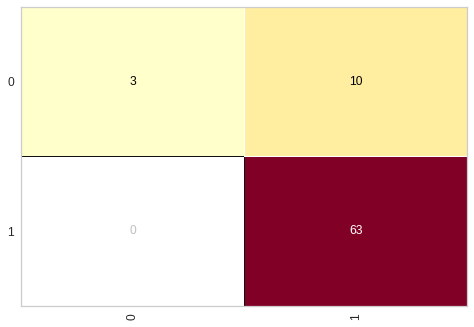

In [65]:
from yellowbrick.classifier import ConfusionMatrix
cm2 = ConfusionMatrix(svm)
cm2.fit(x_treino,y_treino)
cm2.score(x_teste, y_teste)

In [66]:
print(classification_report(y_teste, previsão))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.86      1.00      0.93        63

    accuracy                           0.87        76
   macro avg       0.93      0.62      0.65        76
weighted avg       0.89      0.87      0.83        76



Bom, testando o algoritimo de SVM mas notamos que tanto na acurácia geral, quanto nos resultados na previsões individuais de automatico e manual, que o algoritimo de Random Forest, mostrou um desempenho um pouco melhor

é claro que podemos melhorar este resultado: 

1) testando mais algoritimos

2) adicionando e colhendo mais informações no dataset, pois temos muitos poucos modelos de carros automaticos, e talvez por isso, os algoritimos estejam sofrendo mais para aprender e/ ou testar